# TMA 01, question 3 (45 marks)

**Name**: Michael Leipper
    
**PI**: C8044072

### The task

In question 1, you started looking at a dataset covering the wholesale values for fruit and vegetables for the years 2004-2012. The dataset was available at:

https://data.gov.uk/dataset/agricultural_market_reports
    
The entire dataset is available for download, but we have also provided a download of the data in the file <code>fruitveg.csv</code> in the <code>datasets</code> directory.

Visit the website via the above link, read the description of the data and then answer the following questions.

You are now required to combine some of the information from this dataset with data about the amount of orchard space in England and Wales, which you can download from this site:

    https://data.gov.uk/dataset/orchard_fruit_survey

but which is also contained in the file <code>orchfruit_ap&pr_30may13.csv</code> in the <code>datasets</code> directory.

**You must produce a graphical representation of the changes in average wholesale price and orchard space for each type of dessert apple grown in England and Wales. You should then discuss what your representation shows.**

*(45 marks)*

### Some guidance

This TMA question gives you the opportunity to demonstrate your mastery of the techniques in carrying out a small-scale data analysis. Specifically, this question requires you to clean two datasets, combine and reshape them, and graphically present the cleaned data. All the techniques required to answer this question can be found in Parts 2-5, and are illustrated in the associated notebooks.

There are many ways you could approach this task, but one way might be to produce a pandas dataframe, containing the values so that for each variety of apple, and for each year, the average wholesale price for the year is listed, and the total orchard space given over to that variety. The final dataframe could look something like this:



|Apple variety|Year|Average wholesale price|Orchard space|
|---|---|---|---|
|Cox|2004 | 45 | 12 |
|Cox|2012 | 45 | 12 |
|Worcester|2004 | 23 | 1 |
|Worcester|2012 | 23 | 1 |
|$\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ |


(although note that the figures 45, 12, 23 and 1 are just for illustration; they are not necessarily the correct values for the question).


You should then construct one or more plots showing how the relationships between the type of apple, the average wholesale price of that type, and the England and Wales orchard space for each type has changed over the period 2004-2015. You should also give an explanation of what you believe the plot shows.

This question requires that you complete a number of tasks:

1. You need to examine the datasets. You should consider questions such as how missing data is handled, whether there is any dirtiness or ambiguity in the data, and any differences in how data is represented in the two datasets. This task uses the techniques described in Part 3, section 2.

2. You will need to capture the data in a dataframe in the form described above. This task uses the techniques described in Part 3, section 3 and Part 4.

3. Finally, you should select a visualisation method for the data in the dataset, and present a plot of the data, with a description of how you think it should be interpreted. This task uses the techniques described in Part 5. We are not prescribing a particular choice of visualisation: you should choose one that you think is appropriate.


It is crucial for this question to bear in mind that at each stage, you must describe what you have done in sufficient detail that someone could replicate your work. This means that you must:

* explain what any code that you have written does, and execute it in the body of your submitted notebook,

* where you have used tools that are not accessed via python or the notebooks (such as OpenRefine), you should include some screenshots to show what you did, and to help the marker understand your thinking,

* clearly explain any assumptions or simplifications that you have made about the data, and

* interpret your final results in the context of these assumptions and simplifications.


Some guidance on presentation:

* You must present your answer in this notebook.
    
* Do not put too much text or code into each notebook cell. Each cell should contain one or two paragraphs at most, or around ten lines of python.

* Ensure that in your code, you use meaningful variable names.

* You should have a specific cell whose return value is the dataframe described above.

* You should have a specific cell which plots the data in the dataframe.

We have provided a structure for your answer, and you should describe your work under the appropriate headings in the rest of the TMA. The headings do not represent equal amounts of work, nor do they necessarily carry the same weight as the equivalent headings in question 2, because different datasets and different tasks require the effort to be spent in different places. You may need to use several cells to address a particular heading. For example, you would expect to present substantially more work on identifying and handling the missing data, than on importing the datasets. 

### Your answer

#### 1. Import the two datasets

In [234]:
# Load the necessary libraries here:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt

import seaborn as sn

In [235]:
# Start by importing the sqldf function from pandasql:
from pandasql import sqldf

# To make it a bit easier to apply the sqldf function, we will create a 
# simple wrapper function to allow us to supply the query 'q' without the 
# surrounding syntax of the function call.
pysqldf = lambda q: sqldf(q, globals())

In [236]:
fruitveg_df=pd.read_csv('datasets/fruitveg.csv')
#supplied dataset does not allow placement in a dataframe. will 

ParserError: Error tokenizing data. C error: Expected 1 fields in line 138, saw 3


As can be seen the above code throws a error, I will therefore use open refine as a tool to edit some of the data and introduce it into a data frame later in the workbook.

In [237]:
#create data frame for orchid data
orch_df=pd.read_csv('datasets/orchfruit_ap&pr_30may13.csv')

#### 2. Identify and handle missing data

In [238]:
#print out the data frame 
orch_df

,year,Totalapples,Discovery,WorcesterPearmain,Cox(andclones),EgremontRusset,Braeburn,Gala(andclones),Jonagold(andclones),Cameo,Jazz,Kanzi,Other dessert varieties,Spartan,Fiesta/RedPippin,Katy,Bramleys Seedling,Other culinary apples,Cider apples of which:,Bush cider apples,Traditional cider apples,Total plums,Victoria,Marjorie's Seedling,Other plums,Total other orchard fruit,Cherries,Other top fruit (incl. nuts)
0,1999,1709.0,577.0,294.0,4694.0,325.0,NaN,757.0,400.0,NaN,NaN,NaN,1276.0,299.0,186.0,NaN,3427.0,263.0,4996.0,NaN,NaN,1367.0,788.0,164.0,415.0,748.0,591.0,157.0
1,2000,16500.0,484.0,283.0,4186.0,334.0,NaN,828.0,353.0,NaN,NaN,NaN,1194.0,286.0,163.0,NaN,3561.0,234.0,5043.0,4024.0,1019.0,1213.0,659.0,170.0,384.0,590.0,459.0,131.0
2,2001,16983.0,420.0,207.0,3489.0,331.0,NaN,719.0,257.0,NaN,NaN,NaN,1209.0,257.0,133.0,NaN,3100.0,241.0,7010.0,4657.0,2353.0,1072.0,543.0,152.0,377.0,700.0,473.0,227.0
3,2002,15110.0,339.0,196.0,3015.0,268.0,NaN,663.0,201.0,NaN,NaN,NaN,945.0,195.0,109.0,NaN,2567.0,178.0,6738.0,4304.0,2434.0,947.0,493.0,148.0,306.0,579.0,428.0,151.0
4,2003,14346.0,264.0,147.0,2738.0,264.0,306.0,674.0,227.0,NaN,NaN,NaN,729.0,142.0,NaN,NaN,2266.0,180.0,6551.0,4909.0,1642.0,1003.0,474.0,152.0,377.0,522.0,381.0,140.0
5,2004,13612.0,301.0,213.0,3144.0,308.0,194.0,669.0,231.0,NaN,NaN,NaN,957.0,164.0,NaN,NaN,2266.0,139.0,5190.0,3605.0,1585.0,978.0,532.0,152.0,293.0,623.0,389.0,234.0
6,2007,13364.0,189.0,124.0,2128.0,277.0,271.0,740.0,204.0,NaN,NaN,NaN,877.0,137.0,NaN,NaN,2168.0,115.0,6271.0,4590.0,1681.0,835.0,408.0,144.0,283.0,608.0,447.0,161.0
7,2009,13594.0,177.0,133.0,1798.0,293.0,304.0,878.0,316.0,36.0,83.0,144.0,724.0,NaN,NaN,133.0,1955.0,131.0,6624.0,NaN,NaN,869.0,420.0,153.0,296.0,649.0,478.0,171.0
8,2012,14468.0,157.0,115.0,1697.0,224.0,509.0,1312.0,283.0,41.0,117.0,96.0,847.0,NaN,NaN,129.0,1794.0,99.0,7178.0,NaN,NaN,841.0,378.0,161.0,302.0,791.0,609.0,182.0
9,####Cameo Jazz and Kanzi are new categories i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
#orchcid has data missing where there is not a number defined in a cell.
#This represents period where either the apple was not produced or not in season therefore replace NAN values with 0
orch_df.fillna(0, inplace=True)
orch_df

,year,Totalapples,Discovery,WorcesterPearmain,Cox(andclones),EgremontRusset,Braeburn,Gala(andclones),Jonagold(andclones),Cameo,Jazz,Kanzi,Other dessert varieties,Spartan,Fiesta/RedPippin,Katy,Bramleys Seedling,Other culinary apples,Cider apples of which:,Bush cider apples,Traditional cider apples,Total plums,Victoria,Marjorie's Seedling,Other plums,Total other orchard fruit,Cherries,Other top fruit (incl. nuts)
0,1999,1709.0,577.0,294.0,4694.0,325.0,0.0,757.0,400.0,0.0,0.0,0.0,1276.0,299.0,186.0,0.0,3427.0,263.0,4996.0,0.0,0.0,1367.0,788.0,164.0,415.0,748.0,591.0,157.0
1,2000,16500.0,484.0,283.0,4186.0,334.0,0.0,828.0,353.0,0.0,0.0,0.0,1194.0,286.0,163.0,0.0,3561.0,234.0,5043.0,4024.0,1019.0,1213.0,659.0,170.0,384.0,590.0,459.0,131.0
2,2001,16983.0,420.0,207.0,3489.0,331.0,0.0,719.0,257.0,0.0,0.0,0.0,1209.0,257.0,133.0,0.0,3100.0,241.0,7010.0,4657.0,2353.0,1072.0,543.0,152.0,377.0,700.0,473.0,227.0
3,2002,15110.0,339.0,196.0,3015.0,268.0,0.0,663.0,201.0,0.0,0.0,0.0,945.0,195.0,109.0,0.0,2567.0,178.0,6738.0,4304.0,2434.0,947.0,493.0,148.0,306.0,579.0,428.0,151.0
4,2003,14346.0,264.0,147.0,2738.0,264.0,306.0,674.0,227.0,0.0,0.0,0.0,729.0,142.0,0.0,0.0,2266.0,180.0,6551.0,4909.0,1642.0,1003.0,474.0,152.0,377.0,522.0,381.0,140.0
5,2004,13612.0,301.0,213.0,3144.0,308.0,194.0,669.0,231.0,0.0,0.0,0.0,957.0,164.0,0.0,0.0,2266.0,139.0,5190.0,3605.0,1585.0,978.0,532.0,152.0,293.0,623.0,389.0,234.0
6,2007,13364.0,189.0,124.0,2128.0,277.0,271.0,740.0,204.0,0.0,0.0,0.0,877.0,137.0,0.0,0.0,2168.0,115.0,6271.0,4590.0,1681.0,835.0,408.0,144.0,283.0,608.0,447.0,161.0
7,2009,13594.0,177.0,133.0,1798.0,293.0,304.0,878.0,316.0,36.0,83.0,144.0,724.0,0.0,0.0,133.0,1955.0,131.0,6624.0,0.0,0.0,869.0,420.0,153.0,296.0,649.0,478.0,171.0
8,2012,14468.0,157.0,115.0,1697.0,224.0,509.0,1312.0,283.0,41.0,117.0,96.0,847.0,0.0,0.0,129.0,1794.0,99.0,7178.0,0.0,0.0,841.0,378.0,161.0,302.0,791.0,609.0,182.0
9,####Cameo Jazz and Kanzi are new categories i...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 The Data for orchcid is missing several years from 1999 - 2004 it is run as a consecutive dataset starts skipping years.
 This leaves me with no option but to ignore the years that no data is for when combing the data later in the exercise. 

In open refine I took the first steps to remove data that was not of interest in this data comparision in the fruit and ved csv. I did this via the following searches:

* text filter column 1 removed all matching rows cabbage. 
* text filter column 1 removed all matching rows cherries. 
* text filter column 1 removed all matching rows black
* text filter column 1 removed all matching rows pear 
* text filter column 1 removed all matching rows goose
* text filter column 1 removed all matching rows raspberries
* text filter column 1 removed all matching rows plums and gages
* text filter column 1 removed all matching rows damsons
* text filter column 1 removed all matching rows Redcurrants
* text filter column 1 removed all matching rows VEGETABLES
* text filter column 1 removed all matching rows Straw
* text filter column 1 removed all matching rows b
* text filter column 1 removed all matching rows u
* text filter column 1 removed all matching rows ca
* text filter column 1 removed all matching rows ce
* text filter column 1 removed all matching rows sl
* text filter column 1 removed all matching rows sw
* text filter column 1 removed all matching rows to
* text filter column 1 removed all matching rows shel
* text filter column 1 removed all matching rows an
* text filter column 1 removed all matching rows lee
* text filter column 1 removed all matching rows wa
* text filter column 1 removed all matching rows par
* text filter column 1 removed all matching rows pi
* text filter column 1 removed all matching rows sa
* text filter column 1 removed all matching rows or
* text filter column 4 removed all matching rows bun
* text filter column 4 removed all matching rows ea
* text filter column 4 removed all matching rows lea

This left the dataset clean of anything other than the information about apples. Doing this makes it quicker to spot and clean errors with the data that I'm interested in.


I then created a column based on column 1 named as isYear by searching for value.contains("20") 

This created a column with a boolean value that could be used to find rows which contained the year
Then using Facet, text facet tool on the isYear column its possible to sperate the year into a new column.

Using value[0,5] we can create a new column that is our year this will contain some dirty text however this is only on a few cells and we will deal with that later.

Using text filter tool  on Year column if we search for "(" this brings up the places where the string "(new item for 20..)" has been moved over along with the actual year. 
by clicking editing on the cell we can delete all occurrences of this string from the column. 
we no longer have use for isYear so it can be removed.

Next by clicking year edit cells fill down we can link a year with each row. 
Next rename the column to what is in row one it units jan feb etc
Now using a text filter on Units removed all matching rows 
This brings us down to a dataset containing 25 rows all of which are apples listed by year.  

 Now we only have the information we are interested in we can look at further cleaning of the dataset .When looking at the data for fruitandveg in open refine it is clear that amounts of data are missing this
 is due to the seasonal growing times of crops so therefore apple x may not have been availbie to purchase on any one
 month. This means that many months do not have a value 

#### 3. Identify and handle inconsistent or dirty data

In [240]:
#remove inconsistant and unwanted data from orch_df
unwanted_orch = ['Cherries','Other plums','Other top fruit (incl. nuts)','Total other orchard fruit','Marjorie\'s Seedling','Victoria','Total plums']
for fruit in unwanted_orch:
    del orch_df[fruit]

In [241]:
#This leaves us with a data frame free of plums 
orch_df

,year,Totalapples,Discovery,WorcesterPearmain,Cox(andclones),EgremontRusset,Braeburn,Gala(andclones),Jonagold(andclones),Cameo,Jazz,Kanzi,Other dessert varieties,Spartan,Fiesta/RedPippin,Katy,Bramleys Seedling,Other culinary apples,Cider apples of which:,Bush cider apples,Traditional cider apples
0,1999,1709.0,577.0,294.0,4694.0,325.0,0.0,757.0,400.0,0.0,0.0,0.0,1276.0,299.0,186.0,0.0,3427.0,263.0,4996.0,0.0,0.0
1,2000,16500.0,484.0,283.0,4186.0,334.0,0.0,828.0,353.0,0.0,0.0,0.0,1194.0,286.0,163.0,0.0,3561.0,234.0,5043.0,4024.0,1019.0
2,2001,16983.0,420.0,207.0,3489.0,331.0,0.0,719.0,257.0,0.0,0.0,0.0,1209.0,257.0,133.0,0.0,3100.0,241.0,7010.0,4657.0,2353.0
3,2002,15110.0,339.0,196.0,3015.0,268.0,0.0,663.0,201.0,0.0,0.0,0.0,945.0,195.0,109.0,0.0,2567.0,178.0,6738.0,4304.0,2434.0
4,2003,14346.0,264.0,147.0,2738.0,264.0,306.0,674.0,227.0,0.0,0.0,0.0,729.0,142.0,0.0,0.0,2266.0,180.0,6551.0,4909.0,1642.0
5,2004,13612.0,301.0,213.0,3144.0,308.0,194.0,669.0,231.0,0.0,0.0,0.0,957.0,164.0,0.0,0.0,2266.0,139.0,5190.0,3605.0,1585.0
6,2007,13364.0,189.0,124.0,2128.0,277.0,271.0,740.0,204.0,0.0,0.0,0.0,877.0,137.0,0.0,0.0,2168.0,115.0,6271.0,4590.0,1681.0
7,2009,13594.0,177.0,133.0,1798.0,293.0,304.0,878.0,316.0,36.0,83.0,144.0,724.0,0.0,0.0,133.0,1955.0,131.0,6624.0,0.0,0.0
8,2012,14468.0,157.0,115.0,1697.0,224.0,509.0,1312.0,283.0,41.0,117.0,96.0,847.0,0.0,0.0,129.0,1794.0,99.0,7178.0,0.0,0.0
9,####Cameo Jazz and Kanzi are new categories i...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


row indexed at 9 though 12 only contain contextual information 
####Cameo Jazz and Kanzi are new categories introduced in 2009####,,,,,,,,,,,,,,,,,,,,,,,,,,,
####Spartan have been included with' other dessert apples 'from 2009####,,,,,,,,,,,,,,,,,,,,,,,,,,,
####Fiesta/RedPippin have been included in 'other dessert apples 'from 2003####,,,,,,,,,,,,,,,,,,,,,,,,,,,
####Katy was included in 'other dessert apples 'until 2009####,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [242]:
#delete row indexed 9- 12 from orch dataframe
orch_df.drop(orch_df.index[[9,10,11,12]], inplace=True)


 In orchids it is clear that the Total apples column contains errors in row 0 the total apples is listed as 1709 
 however cox alone represents 4694 units so therefor this figure must represent a typo. 
 


The two datasets are inconsistnt in the way they define the apples differently orch_df lists apples as:
Discovery,1
WorcesterPearmain,3
Cox(andclones),2
EgremontRusset,11
Braeburn,5
Gala(andclones),6
Jonagold(andclones),8
Cameo,12
Jazz,13
Kanzi,14
Other dessert varieties,10
Spartan,7
Fiesta/RedPippin,4
Katy,15
Bramleys Seedling,9
Other culinary apples,16
Cider apples of which:,17
Bush cider apples,18
Traditional cider apples19

The fruit veg contains apples listed as:
Cox’s Orange-group,1
Discovery,2
Egremont Russet,11
Spartan,7
Worcester Pearmain,3
Red Pippin,4
Braeburn,5
Gala,6
Other Early Season,20
Other Mid Season,21
Other Late Season,
Jonogold – group,8
Bramley’s Seedling,9
Red,10


I will put these in a table so next to the most likely apple in each dataset.

|orch_df| fruitandveg |
|------|------|
|  Cox(andclones) | Cox’s Orange-group|
|------|------|
|   Discovery   |   Discovery |
|------|------|
| WorcesterPearmain | Worcester Pearmain  |
|------|------|
|Fiesta/RedPippin |Red Pippin |
|------|------|
|Braeburn |Braeburn |
|------|------|
|Gala(andclones) | Gala|
|------|------|
|Spartan |Spartan |
|------|------|
|Jonagold(andclones) |Jonogold – group|
|------|------|
|Bramleys Seedling |Bramley’s Seedling |
|------|------|
|Other dessert varieties||
|------|------|
|EgremontRusset|Egremont Russet|
|------|------|
|Cameo||
|------|------|
|Jazz||
|------|------|
|Kanzi||
|------|------|
|Katy|	Katy|
|------|------|
|Other culinary apples||
|------|------|
|Cider apples of which:||
|------|------|
|Bush cider apples||
|------|------|
|Traditional cider apples||
|------|------|
||Other Early Season|
|------|------|
||Other Mid Season|
|------|------|
||Other Late Season|
||Red|


Using open refine will edit a cox's groups cell and replace with Cox(andclones)and apply this to all identical cells 

Using open refine will edit Egremont Russet and replace with and EgremontRusset apply this to all identical cells 

Using open refine will edit Worcester Pearmain and replace with and WorcesterPearmain apply this to all identical cells 

Using open refine will edit a  Gala cell and replace with Gala(andclones) and apply this to all identical cells 

Using open refine will edit a  Jonagold -group cell and replace with Jonagold(andclones) and apply this to all identical cells 

Using open refine will edit a Bramley’s Seedling cell and replace with Bramleys Seedling and apply this to all identical cells 

Using open refine will edit a Red Pippin cell and replace with Fiesta/RedPippin and apply this to all identical cells

Using open refine will edit and remove all occurances of Red 

At first glance the fruit and veg data does not contain any reference to any of the cider apple types. How this could be listed under the various Other Season headings. 

As these other types of apples are subcatogories of dessert apples a quick Google search on "can desert apples be used for cider making" yields "Cider apples are a group of apple cultivars grown for their use in cider production, distinguished from cookers and eaters by their generally poor qualities for these uses, often because of bitterness or dryness of flavour. ... Cider apples therefore often have higher sugar levels than dessert and cooking apples." as a result. Therefore it is highly unlikely that any of the cider apples are represented in the fruit and veg dataset. 
I will therefore delete all cider apples for the orch_df.

Cameo	
------	------
Jazz	
------	------
Kanzi	
------	------
Other culinary apples	
------	------

Other Early Season
------	------
Other Mid Season
------	------
Other Late Season


I shall remove the above eight apple types from their respective datasets as it is unclear how to match them.  

In [243]:
#funtion deletes unessicery column
del orch_df['Traditional cider apples']

In [244]:
#funtion deletes unessicery column
del orch_df['Cider apples of which:']

In [245]:
#funtion deletes unessicery column
del orch_df['Bush cider apples']

In [246]:
#funtion deletes unessicery column
del orch_df['Cameo']

In [247]:
#funtion deletes unessicery column
del orch_df['Jazz']

In [248]:
#funtion deletes unessicery column
del orch_df['Kanzi']

In [249]:
#funtion deletes unessicery column
del orch_df['Totalapples']

In [250]:
#funtion deletes unessicery column
del orch_df['Other culinary apples']

In [251]:
orch_df

,year,Discovery,WorcesterPearmain,Cox(andclones),EgremontRusset,Braeburn,Gala(andclones),Jonagold(andclones),Other dessert varieties,Spartan,Fiesta/RedPippin,Katy,Bramleys Seedling
0,1999,577.0,294.0,4694.0,325.0,0.0,757.0,400.0,1276.0,299.0,186.0,0.0,3427.0
1,2000,484.0,283.0,4186.0,334.0,0.0,828.0,353.0,1194.0,286.0,163.0,0.0,3561.0
2,2001,420.0,207.0,3489.0,331.0,0.0,719.0,257.0,1209.0,257.0,133.0,0.0,3100.0
3,2002,339.0,196.0,3015.0,268.0,0.0,663.0,201.0,945.0,195.0,109.0,0.0,2567.0
4,2003,264.0,147.0,2738.0,264.0,306.0,674.0,227.0,729.0,142.0,0.0,0.0,2266.0
5,2004,301.0,213.0,3144.0,308.0,194.0,669.0,231.0,957.0,164.0,0.0,0.0,2266.0
6,2007,189.0,124.0,2128.0,277.0,271.0,740.0,204.0,877.0,137.0,0.0,0.0,2168.0
7,2009,177.0,133.0,1798.0,293.0,304.0,878.0,316.0,724.0,0.0,0.0,133.0,1955.0
8,2012,157.0,115.0,1697.0,224.0,509.0,1312.0,283.0,847.0,0.0,0.0,129.0,1794.0


Other Early Season,
Other Mid Season,
and Other Late Season can all be removed by searching the apple type column in Open refine for their respective strings.

I have removed column 1 from the fruit and veg dataset. This only contained information about if the apple was a cooking or a desert apple. This was done by clicking on the column in open refine and clicking remove this column.

In the fruit and veg Dataset each remaining apple type has three rates 1st 2nd and avg. 
I am going to remove the second and ave rows from each of the apples and use the remaining data to build a dataframe
In the Quality column I will select text filter and then type 2nd and delete all rows then doing the same with ave.
I will then export this as a CSV file to apples2004-2015.

In [252]:
#having exported the edited datafile from open refine I can now put it into a pandas dataframe. 
apples_df=pd.read_csv('datasets/apples2004-2015.csv')

Since i am going to abandon the monthly prices in favour of generating the mean price of the apples for the year. 

In [253]:
apples_df

,year,Apple Type,Quality,Units,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,﻿2004,Bramleys Seedling,1st,£/kg,0.68,0.65,0.66,0.68,0.76,0.82,1.10,0.65,0.51,0.48,0.52,0.52
1,﻿2004,Cox(andclones),1st,£/kg,0.62,0.63,0.60,0.58,NaN,NaN,NaN,NaN,0.68,0.51,0.53,0.58
2,﻿2004,Discovery,1st,£/kg,NaN,NaN,NaN,NaN,NaN,NaN,0.75,0.51,0.37,NaN,NaN,NaN
3,﻿2004,EgremontRusset,1st,£/kg,0.57,0.58,0.50,NaN,NaN,NaN,NaN,0.83,0.64,0.59,0.61,0.64
4,﻿2004,Spartan,1st,£/kg,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49,0.46,0.44,0.51
5,﻿2004,WorcesterPearmain,1st,£/kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49,0.46,NaN,NaN
6,﻿2004,Fiesta/RedPippin,1st,£/kg,NaN,0.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.47,NaN,NaN
7,﻿2004,Gala(andclones),1st,£/kg,0.52,0.52,0.50,0.48,NaN,NaN,NaN,NaN,0.50,0.45,0.45,0.48
8,﻿2004,Jonagold(andclones),1st,£/kg,0.50,0.39,0.49,0.41,0.39,0.36,0.49,0.37,0.33,0.40,0.35,0.44
9,﻿2004,Katy,1st,£/kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.42,NaN,NaN,NaN


In [254]:
# this loops through the dictionary of columns and works out the mean for each row. 
# we know this is looking per row as axis is set to 1.
# It then takes the produced series and feeds that back into apples_df to create a new column 
column_list=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
apples_df['average cost £/kg per year']= apples_df[column_list].mean(axis=1,skipna=True)

In [255]:
apples_df

,year,Apple Type,Quality,Units,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,average cost £/kg per year
0,﻿2004,Bramleys Seedling,1st,£/kg,0.68,0.65,0.66,0.68,0.76,0.82,1.10,0.65,0.51,0.48,0.52,0.52,0.669167
1,﻿2004,Cox(andclones),1st,£/kg,0.62,0.63,0.60,0.58,NaN,NaN,NaN,NaN,0.68,0.51,0.53,0.58,0.591250
2,﻿2004,Discovery,1st,£/kg,NaN,NaN,NaN,NaN,NaN,NaN,0.75,0.51,0.37,NaN,NaN,NaN,0.543333
3,﻿2004,EgremontRusset,1st,£/kg,0.57,0.58,0.50,NaN,NaN,NaN,NaN,0.83,0.64,0.59,0.61,0.64,0.620000
4,﻿2004,Spartan,1st,£/kg,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49,0.46,0.44,0.51,0.446000
5,﻿2004,WorcesterPearmain,1st,£/kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49,0.46,NaN,NaN,0.475000
6,﻿2004,Fiesta/RedPippin,1st,£/kg,NaN,0.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.47,NaN,NaN,0.465000
7,﻿2004,Gala(andclones),1st,£/kg,0.52,0.52,0.50,0.48,NaN,NaN,NaN,NaN,0.50,0.45,0.45,0.48,0.487500
8,﻿2004,Jonagold(andclones),1st,£/kg,0.50,0.39,0.49,0.41,0.39,0.36,0.49,0.37,0.33,0.40,0.35,0.44,0.410000
9,﻿2004,Katy,1st,£/kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.42,NaN,NaN,NaN,0.500000


Any cells with 2004 in need to be changed to match 2004 in orch_df this error was first picked up when I tried to do a sql join later in the pipeline.

In [256]:
# have noticed a error with 2004 this looks through all values in year column and replaces 2004 error
apples_df.loc[apples_df['year'] == "﻿2004", 'year'] = 2004

In [257]:
# romove month columns from data frame as no longer required.
for month in column_list:
    del apples_df[month]

In [258]:
#now columns are not needed
col_del= ['Quality','Units']
for item in col_del:
    del apples_df[item]

In [262]:
# prints out apples_df  after editing 
apples_df

,year,Apple Type,average cost £/kg per year
0,2004,Bramleys Seedling,0.669167
1,2004,Cox(andclones),0.591250
2,2004,Discovery,0.543333
3,2004,EgremontRusset,0.620000
4,2004,Spartan,0.446000
5,2004,WorcesterPearmain,0.475000
6,2004,Other dessert varieties,0.465000
7,2004,Gala(andclones),0.487500
8,2004,Jonagold(andclones),0.410000
9,2004,Katy,0.500000


get rid of NAN in average column - replace with N/A

In [260]:
#some of the averages contain NaN values where the rows had no data for that year so this fills those values with 0
apples_df.fillna(0, inplace=True)

#### 4. Identify and handle ambiguity and vagueness

####Spartan have been included with' other dessert apples 'from 2009####,,,,,,,,,,,,,,,,,,,,,,,,,,,
####Fiesta/RedPippin have been included in 'other dessert apples 'from 2003####,,,,,,,,,,,,,,,,,,,,,,,,,,,

orch_df has no data about Fiesta/RedPippin for the period that we're interested in so this column can be deleted and Other dessert apples renamed as Fiesta/RedPippin.

Since Spartan has no occurances in Orch_df we shall after 2009 we shall delete index rows that refereence that type after 2009.

In [261]:
apples_df['Apple Type']=apples_df['Apple Type'].replace({'Fiesta/RedPippin': 'Other dessert varieties'})

I will remove Katy and braeburn from both datasets due to not enough data. 

#### 5. Put the data into an appropriate form for plotting

In [271]:
# Let's apply groupby over the Apple Type column this will allow me to create a dataframe for each group.
groupeddata = apples_df.groupby(['Apple Type'])
groupeddata

In [272]:
# Hmmm, the result is too complex just to display the data 
#            structure - so pandas tells us it is an object.

# What is returned is actually a list of two-valued-tuples, where the 
# first value is the group 'key' value, 
# and the second value is a DataFrame of the rows in that group.

# So we can pull those two values out with a loop construct
for groupkey, grouprows in groupeddata:
    print(groupkey)
    print(grouprows)

Braeburn
     year Apple Type  average cost £/kg per year
98   2014   Braeburn                       0.675
107  2015   Braeburn                       0.624
Bramleys Seedling
     year         Apple Type  average cost £/kg per year
0    2004  Bramleys Seedling                    0.669167
10   2005  Bramleys Seedling                    0.531667
19   2006  Bramleys Seedling                    0.575833
28   2007  Bramleys Seedling                    0.639167
37   2008  Bramleys Seedling                    0.796667
46   2009  Bramleys Seedling                    0.633333
55   2010  Bramleys Seedling                    0.627500
64   2011  Bramleys Seedling                    0.645000
73   2012  Bramleys Seedling                    0.833333
82   2013  Bramleys Seedling                    0.994167
91   2014  Bramleys Seedling                    0.682500
101  2015  Bramleys Seedling                    0.642000
Cox(andclones)
     year      Apple Type  average cost £/kg per year
1    2004  Cox(a

In [232]:
# creating dataframe for bramleys group
Bramleys_df=groupeddata.get_group('Bramleys Seedling')

Now to join Bramleys_df with orch_df using year as a key value. 

In [233]:
# query takes content of bramleys and inner joins with orchid year where  year equals year. 
query = '''
SELECT *
FROM 
    Bramleys_df b
INNER JOIN
    orch_df o
    
        ON b.year = o.year

; 
'''
result = pysqldf(query)
result

,year,Apple Type,average cost £/kg per year,BrandName,year,Discovery,WorcesterPearmain,Cox(andclones),EgremontRusset,Braeburn,Gala(andclones),Jonagold(andclones),Other dessert varieties,Spartan,Fiesta/RedPippin,Katy,Bramleys Seedling
0,2004,Bramleys Seedling,0.669167,Bramleys Seedling,2004,301.0,213.0,3144.0,308.0,194.0,669.0,231.0,957.0,164.0,0.0,0.0,2266.0
1,2007,Bramleys Seedling,0.639167,Bramleys Seedling,2007,189.0,124.0,2128.0,277.0,271.0,740.0,204.0,877.0,137.0,0.0,0.0,2168.0
2,2009,Bramleys Seedling,0.633333,Bramleys Seedling,2009,177.0,133.0,1798.0,293.0,304.0,878.0,316.0,724.0,0.0,0.0,133.0,1955.0
3,2012,Bramleys Seedling,0.833333,Bramleys Seedling,2012,157.0,115.0,1697.0,224.0,509.0,1312.0,283.0,847.0,0.0,0.0,129.0,1794.0


The above is not how I wanted the Df to come out however when i put:
query = '''
SELECT Bramleys_df.*,orch_df.Bramleys Seedling
FROM 
    Bramleys_df.b
INNER JOIN
    orch_df o
    
        ON b.year = o.year

; 
'''
as a query a error was thrown. I hope to get some feedBack on how better to join tables with sql as this did not work as intended. 

In [180]:
del result['year']
result

,Apple Type,average cost £/kg per year,Discovery,WorcesterPearmain,Cox(andclones),EgremontRusset,Braeburn,Gala(andclones),Jonagold(andclones),Other dessert varieties,Spartan,Fiesta/RedPippin,Katy,Bramleys Seedling
0,Bramleys Seedling,0.669167,301.0,213.0,3144.0,308.0,194.0,669.0,231.0,957.0,164.0,0.0,0.0,2266.0
1,Bramleys Seedling,0.639167,189.0,124.0,2128.0,277.0,271.0,740.0,204.0,877.0,137.0,0.0,0.0,2168.0
2,Bramleys Seedling,0.633333,177.0,133.0,1798.0,293.0,304.0,878.0,316.0,724.0,0.0,0.0,133.0,1955.0
3,Bramleys Seedling,0.833333,157.0,115.0,1697.0,224.0,509.0,1312.0,283.0,847.0,0.0,0.0,129.0,1794.0


In [181]:
result['year']= [2004,2007,2009,2012]

In [182]:
#remove unnercery columns 
data=['Discovery','WorcesterPearmain','Cox(andclones)','EgremontRusset','Braeburn','Gala(andclones)','Jonagold(andclones)','Other dessert varieties','Spartan','Fiesta/RedPippin','Katy']
for item in data:
    del result[item]

In [183]:
sorted_df = result
sorted_df.rename(columns={'Bramleys Seedling': 'Trees'}, inplace=True)
sorted_df

,Apple Type,average cost £/kg per year,Trees,year
0,Bramleys Seedling,0.669167,2266.0,2004
1,Bramleys Seedling,0.639167,2168.0,2007
2,Bramleys Seedling,0.633333,1955.0,2009
3,Bramleys Seedling,0.833333,1794.0,2012


Have merged the two datasets where bramley seedling is the apple type nope to repeat this a few times and merge those dataframes 

In [184]:
Cox_df=groupeddata.get_group('Cox(andclones)')

In [186]:
#delete repetion of year and replace in df 
del result['year']
result['year']= [2004,2007,2009,2012]

In [265]:
#code for query
query = '''
SELECT *
FROM 
    Cox_df b
INNER JOIN
    orch_df o
    
        ON b.year = o.year

; 
'''
result = pysqldf(query)
result

,year,Apple Type,average cost £/kg per year,year,Discovery,WorcesterPearmain,Cox(andclones),EgremontRusset,Braeburn,Gala(andclones),Jonagold(andclones),Other dessert varieties,Spartan,Fiesta/RedPippin,Katy,Bramleys Seedling
0,2004,Cox(andclones),0.591250,2004,301.0,213.0,3144.0,308.0,194.0,669.0,231.0,957.0,164.0,0.0,0.0,2266.0
1,2007,Cox(andclones),0.702222,2007,189.0,124.0,2128.0,277.0,271.0,740.0,204.0,877.0,137.0,0.0,0.0,2168.0
2,2009,Cox(andclones),0.732000,2009,177.0,133.0,1798.0,293.0,304.0,878.0,316.0,724.0,0.0,0.0,133.0,1955.0
3,2012,Cox(andclones),0.858889,2012,157.0,115.0,1697.0,224.0,509.0,1312.0,283.0,847.0,0.0,0.0,129.0,1794.0


In [266]:
data=['Discovery','WorcesterPearmain','EgremontRusset','Braeburn','Gala(andclones)','Jonagold(andclones)','Other dessert varieties','Spartan','Fiesta/RedPippin','Katy','Bramleys Seedling']
for item in data:
    del result[item]

In [267]:
#rename Cox(andclones)
result.rename(columns={'Cox(andclones)': 'Trees'}, inplace=True)

In [268]:
#as can be seen below this gives us a df that can be  appened on  sorted_df
result

,year,Apple Type,average cost £/kg per year,year,Trees
0,2004,Cox(andclones),0.591250,2004,3144.0
1,2007,Cox(andclones),0.702222,2007,2128.0
2,2009,Cox(andclones),0.732000,2009,1798.0
3,2012,Cox(andclones),0.858889,2012,1697.0


In [279]:
 sorted_df=sorted_df.append(result, ignore_index=True)

After doing it this way I decided that It would be a good idea to re-read about SQL for a more easier method below is a function that takes a string as a argument and returns a the query result without the need to delete the year and re match it to the data.  

In [277]:
#funtion containing a query that inner joins the two tables. only returning Apple type, year, apple, and average cost
def runAppleQuery(appleName):
    query = """
    SELECT apples_df.[Apple Type], apples_df.[Year], orch_df.[{0}], apples_df.[average cost £/kg per year]
    FROM 
        apples_df INNER JOIN orch_df
        ON apples_df.year = orch_df.year
    WHERE
        apples_df.[Apple Type] = '{0}'

    ; 
    """.format(appleName)
    return pysqldf(query)
result = runAppleQuery('Bramleys Seedling')
#rename Cox(andclones)
result.rename(columns={'Bramleys Seedling': 'Trees'}, inplace=True)
sorted_df=result
sorted_df

,Apple Type,year,Trees,average cost £/kg per year
0,Bramleys Seedling,2004,2266.0,0.669167
1,Bramleys Seedling,2007,2168.0,0.639167
2,Bramleys Seedling,2009,1955.0,0.633333
3,Bramleys Seedling,2012,1794.0,0.833333


In [280]:
result = runAppleQuery('Bramleys Seedling')
#rename the bramley seeling column
result.rename(columns={'Bramleys Seedling': 'Trees'}, inplace=True)
sorted_df=result
#creates dataframe sorted from first query 
sorted_df

,Apple Type,year,Trees,average cost £/kg per year
0,Bramleys Seedling,2004,2266.0,0.669167
1,Bramleys Seedling,2007,2168.0,0.639167
2,Bramleys Seedling,2009,1955.0,0.633333
3,Bramleys Seedling,2012,1794.0,0.833333


As the Sql query has been created as a functions I call it from within a loop. To do this i will create a dictionary of all the apples that are remaining and then create a loop that cycled through them preforming the needed operations on each apple name.

In [287]:
#listed of the remaining trees which is used by a for loop to call the sql funtion ,
#change the name of the  row and apped the result to sorted_df
trees=['Cox(andclones)','Discovery','EgremontRusset','Gala(andclones)','Jonagold(andclones)','Other dessert varieties','WorcesterPearmain']
for appleName in trees:
    result = runAppleQuery(appleName)
    result.rename(columns={appleName: 'Trees'}, inplace=True)
    sorted_df=sorted_df.append(result, ignore_index=True)
    

In [288]:
sorted_df

,Apple Type,year,Trees,average cost £/kg per year
0,Bramleys Seedling,2004,2266.0,0.669167
1,Bramleys Seedling,2007,2168.0,0.639167
2,Bramleys Seedling,2009,1955.0,0.633333
3,Bramleys Seedling,2012,1794.0,0.833333
4,Cox(andclones),2004,3144.0,0.591250
5,Cox(andclones),2007,2128.0,0.702222
6,Cox(andclones),2009,1798.0,0.732000
7,Cox(andclones),2012,1697.0,0.858889
8,Discovery,2004,301.0,0.543333
9,Discovery,2007,189.0,0.640000


The data now combined in a dataframe where the amount of trees is producing apples is listed against the average price for each apple type. 

#### 6. Visualise the data

Now the data is in a usable dataframe where the average price is listed next to number of trees it is possible to produce a graph to see if their are any trends.  To do this I will create a scatter plot first where I shall plot trees against the average cost per KG. This will enable me to see if there are any trends with supply and average price. 

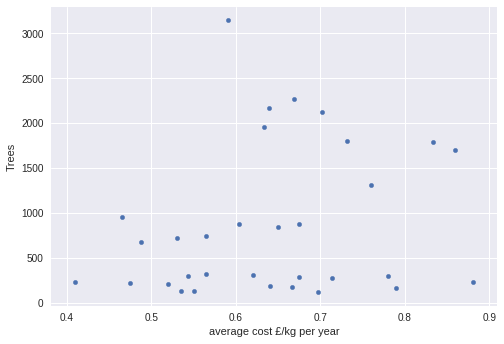

In [293]:
#this is done by calling funtion DataFrame.plot.scatter
sorted_df.plot.scatter(x='average cost £/kg per year',y='Trees')

In [ ]:
plot1: average cost against trees 

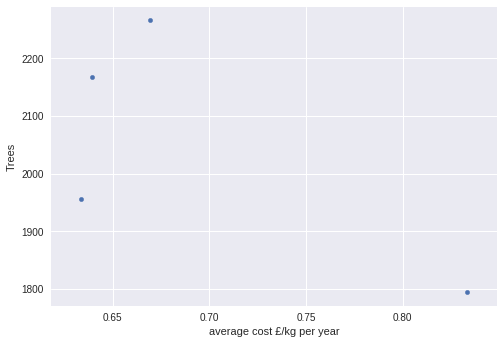

In [294]:
sorted_df.iloc[0:4].plot.scatter(x='average cost £/kg per year',y='Trees')

plot2: Bramleys Seedling trees against average cost per year

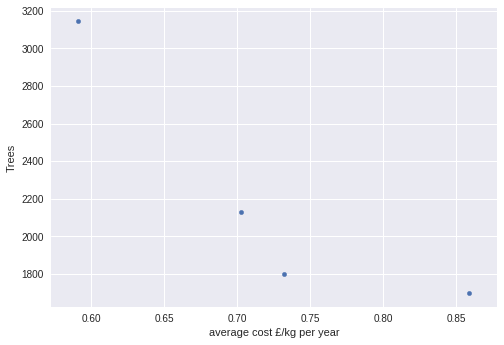

In [296]:
sorted_df.iloc[4:8].plot.scatter(x='average cost £/kg per year',y='Trees')

In [ ]:
plot3 :Cox(andclones)  trees against average cost per year

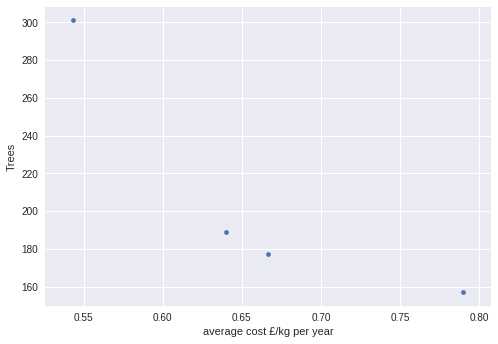

In [297]:
sorted_df.iloc[8:12].plot.scatter(x='average cost £/kg per year',y='Trees')

In [ ]:
plot4:Discovery trees against average cost per year

#### 7. Interpret your plot

Plot one shows that there is no clear correlation between the price of the apples and the number of trees. However this is a very board plot that encompasses all varieties. Therefore I've plotted plots 2-4 these plots are listed by the tree type it is here that there can be seem a suggestion of correlation between average price per year and the level of production. This is especially clear in plot 4 where as the price rises the production level decreases. 

This means that this may warrant further investigation by bringing in more data such as sales levels for apples, in order to see if the price rise when production was cut was due to demand out striping supply.

Also when looking at the data the larger prices are in 2012 so additional costs may also have drove up prices such as logistic costs, cost of production all of which are outside the scope of this investigation.  